### Data Understanding

In [3]:
#Importing necessary 

import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class DataUnderstanding:
    def __init__(self, path):
        self.df = pd.read_csv(path)
       

    def basic_info(self):
        print("DISPLAY BASIC INFORMATION")
        print(f"Number of rows:{self.df.shape[0]}")
        print(f"Number of columns:{self.df.shape[1]}")

        print(self.df.dtypes)

    def summary_statistics(self):
        """Display summary statistics for numerical values"""
        print("Summary Statistics")
        print(self.df.describe())

        print(self.df.describe(include =['object']))

    def dataset_info(self):
        print("Info of the Dataset")
        print(self.df.info())

    def data_quality_checks(self):
        """Checks for missing values , duplicate rows, and unique values in the columns"""
        print("Checking for missing values")
        print(self.df.isnull().sum())

        print("Number uplicate Rows")
        print(self.df.duplicated().sum())

        print("Unique Vlaues pe Column")
        print(self.df.nunique())

# Correct way to instantiate the class
path = "heart_attack_prediction_india.csv"  # Ensure the file is in the correct location
data = DataUnderstanding(path)  # Fix: Creating an instance correctly

# Calling the methods
data.basic_info()
data.summary_statistics()
data.dataset_info()
data.data_quality_checks()


    

        





DISPLAY BASIC INFORMATION
Number of rows:10000
Number of columns:26
Patient_ID                  int64
State_Name                 object
Age                         int64
Gender                     object
Diabetes                    int64
Hypertension                int64
Obesity                     int64
Smoking                     int64
Alcohol_Consumption         int64
Physical_Activity           int64
Diet_Score                  int64
Cholesterol_Level           int64
Triglyceride_Level          int64
LDL_Level                   int64
HDL_Level                   int64
Systolic_BP                 int64
Diastolic_BP                int64
Air_Pollution_Exposure      int64
Family_History              int64
Stress_Level                int64
Healthcare_Access           int64
Heart_Attack_History        int64
Emergency_Response_Time     int64
Annual_Income               int64
Health_Insurance            int64
Heart_Attack_Risk           int64
dtype: object
Summary Statistics
        Patient

In [5]:
data.df.head()


,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


#### Dataset Summary
Total Rows: 10,000
Total Columns: 26

#### Data Types:
24 numerical columns (integer type)
2 categorical columns (State_Name, Gender)

- The dataset no Missing Values: The dataset is complete, with no null values.
#### Key Variables & Statistics
##### Demographics
Age: Ranges from 20 to 79 years (Mean: 49.39).
Gender: Male (5516), Female (4484).
State_Name: 28 unique states, most common being Chhattisgarh (399 records).
##### Health Factors
Diabetes: 9.29% of patients have diabetes.
Hypertension: 24.69% have hypertension.
Obesity: 30.37% are obese.
Smoking Rate: 30.14% are smokers.
Alcohol Consumption: 35.28% consume alcohol.
Physical Activity: 59.58% engage in physical activity.
Diet Score: Ranges from 0 to 10 (Mean: 5.02).
##### Heart Health Indicators
Cholesterol Levels: Range 150–299 mg/dL (Mean: 224.75 mg/dL).
Triglyceride, LDL, HDL Levels: Measured but specific insights not provided.
##### Blood Pressure:
Systolic BP: Mean: 139.67 mmHg (Range: 110–180).
Diastolic BP: Mean: 89.31 mmHg (Range: 60–119).
##### Other Risk Factors
Air Pollution Exposure: 40.36% exposed to pollution.
Family History of Heart Disease: 31.13% have a history.
Stress Level: Mean 5.52 on a scale of 1–10.
Healthcare Access: 31.1% have access.
Heart Attack History: 15.25% have experienced a heart attack.
##### Economic & Response Factors
Annual Income: Ranges from 50,353 to 1,999,714 (Mean: 1,022,062).
Health Insurance: 34.47% have insurance.
Emergency Response Time: 206 minutes on average (Range: 10–399).
Target Variable - Heart Attack Risk
Heart Attack Risk Rate: 30.07% of individuals have a high heart attack risk.
#### Key Observations
- The dataset is balanced and complete with no missing values.
- Key risk factors (obesity, smoking, diabetes, cholesterol levels, stress) are well represented.
- Heart Attack Risk is 30%, meaning nearly 1 in 3 patients is at risk.
- Economic factors (income, health insurance) may impact healthcare access and outcomes.

### Data PreProcessing

#### Data Vizualization

In [6]:
data.df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


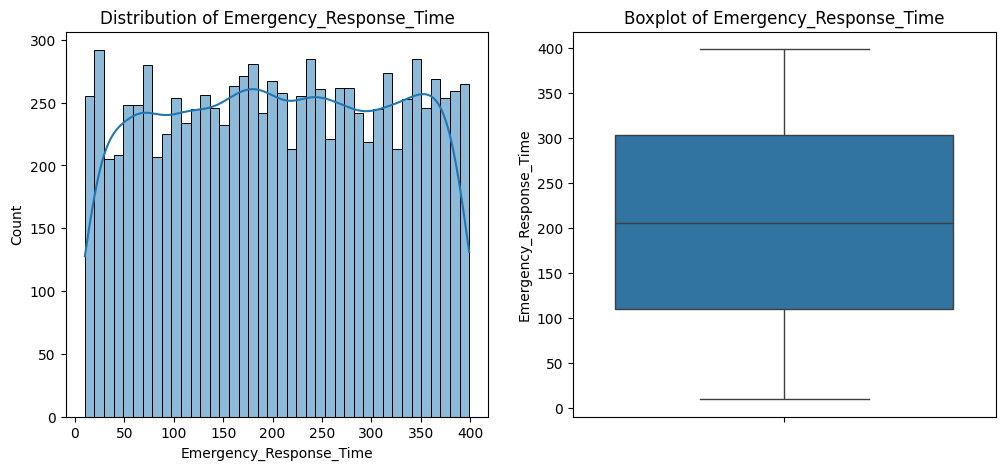

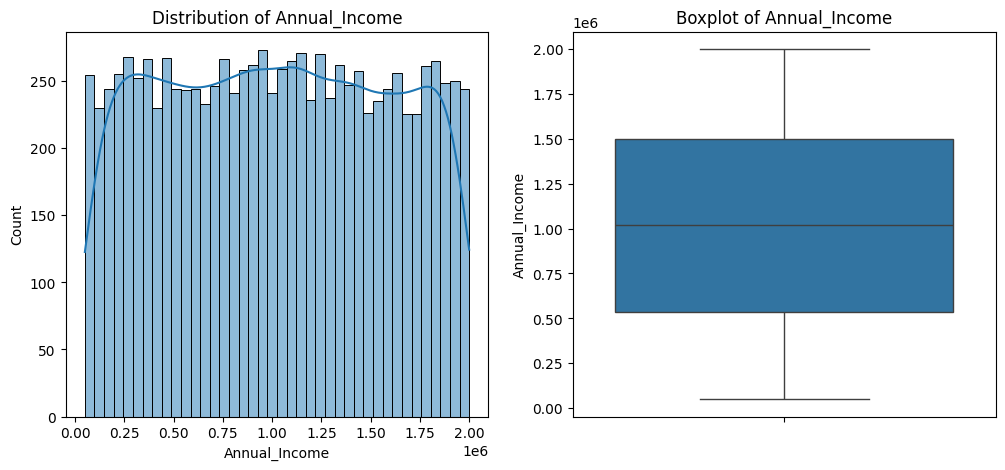

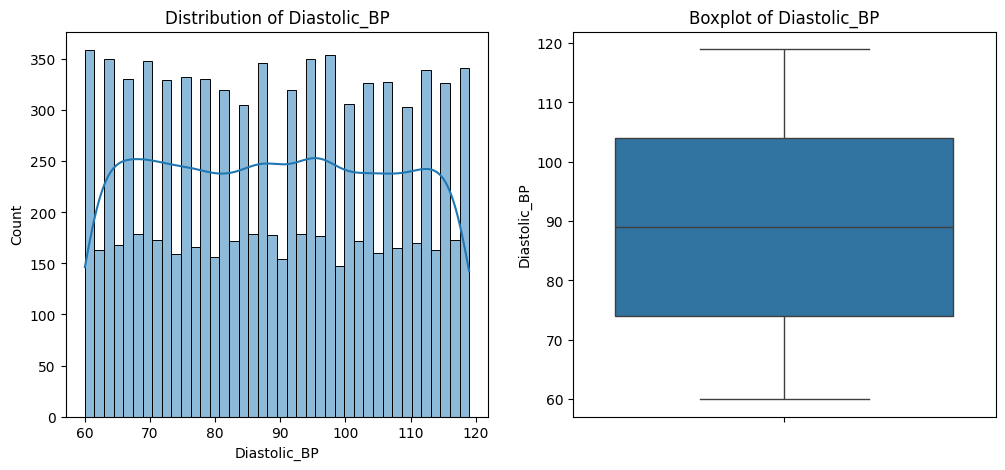

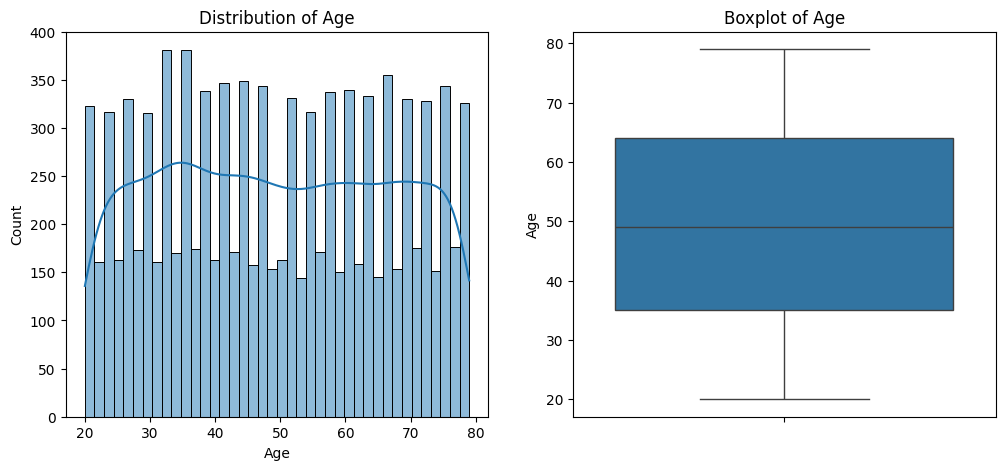

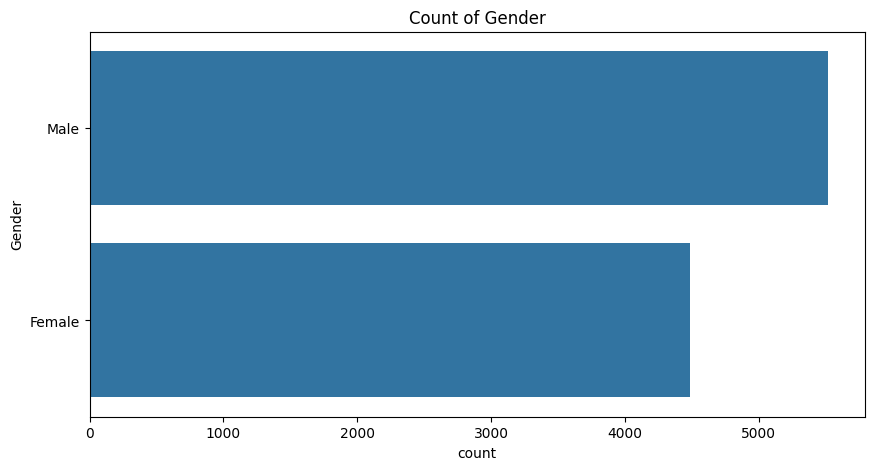

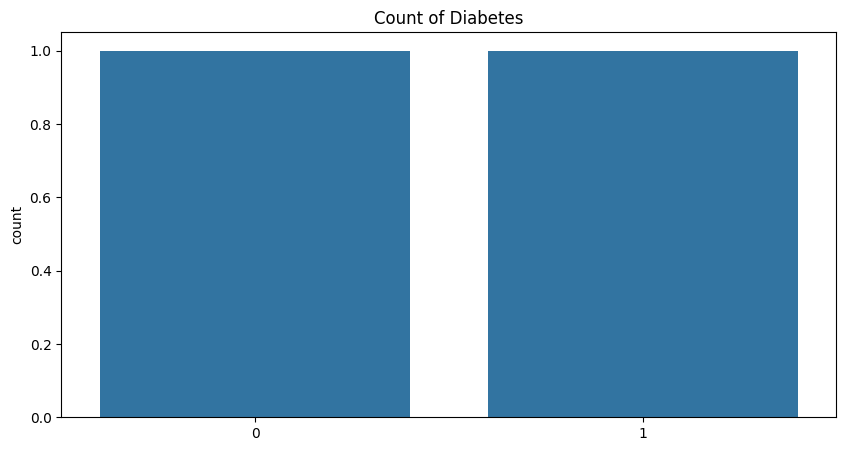

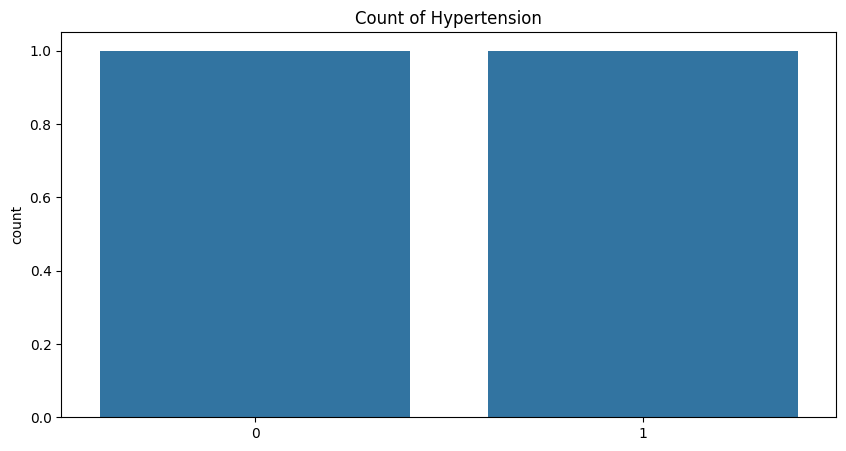

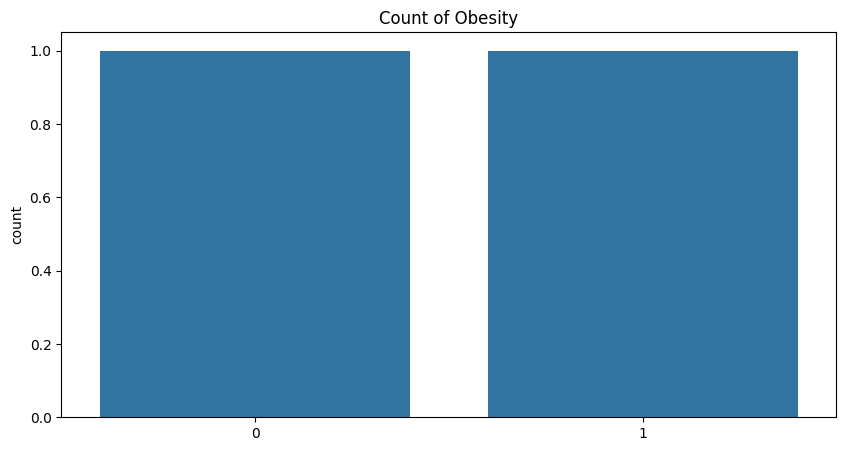

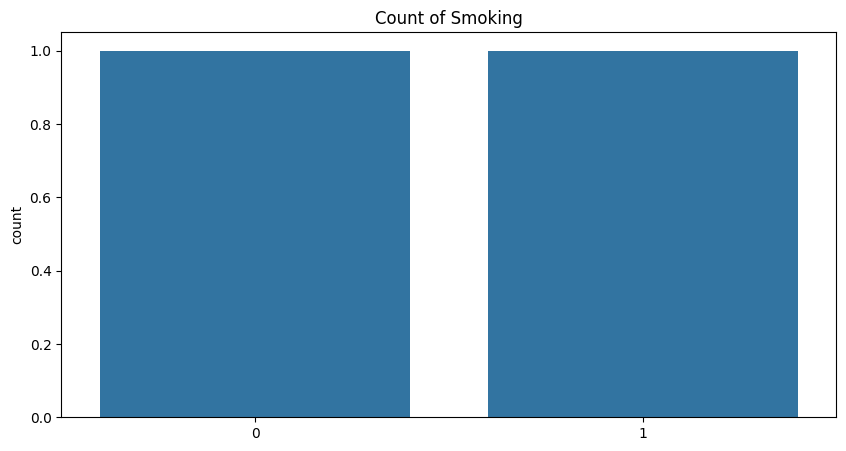

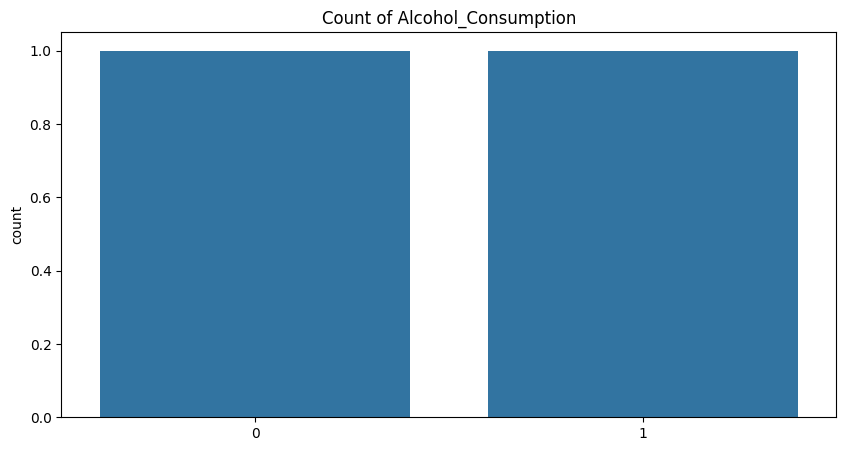

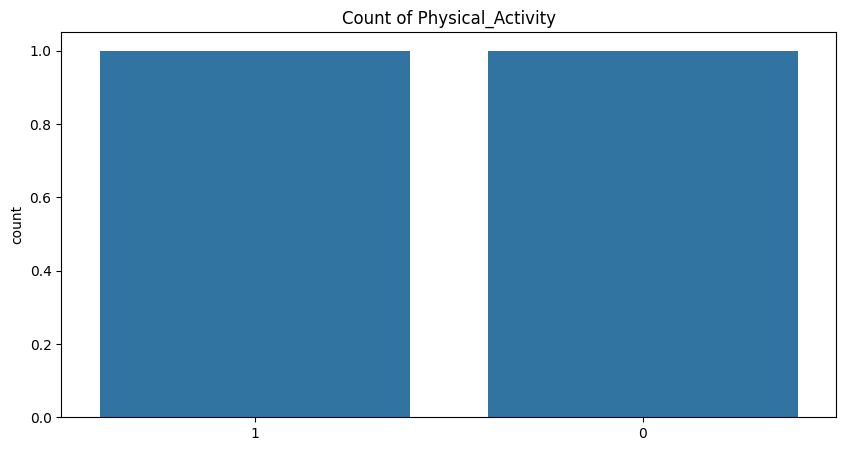

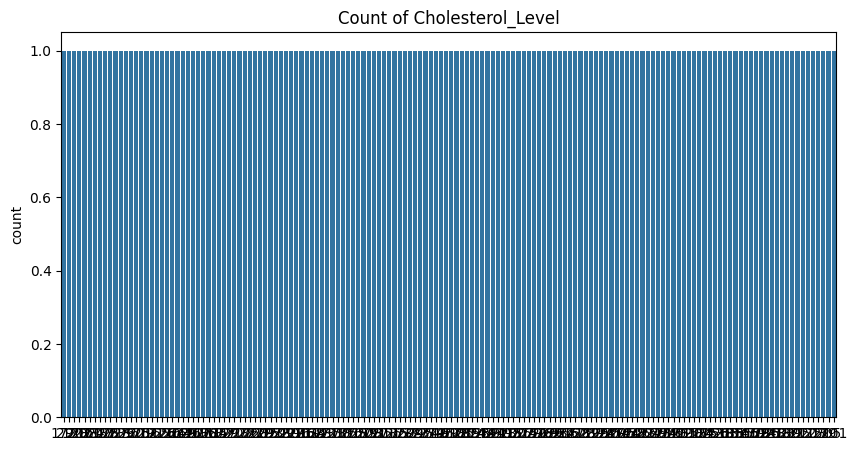

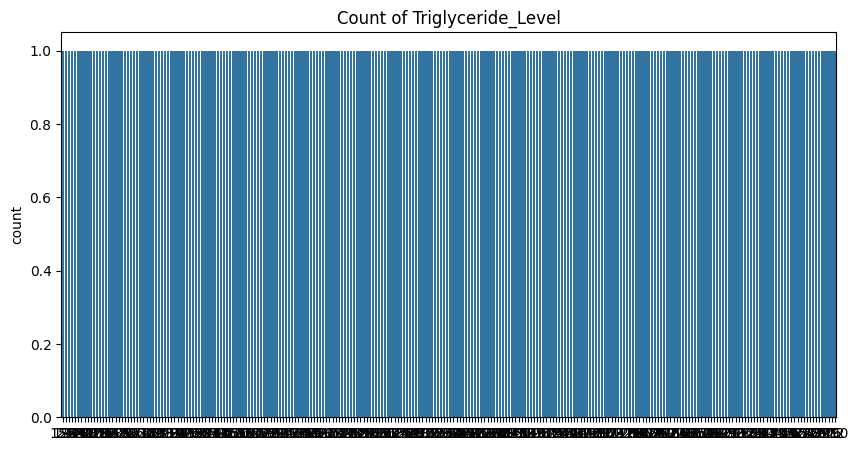

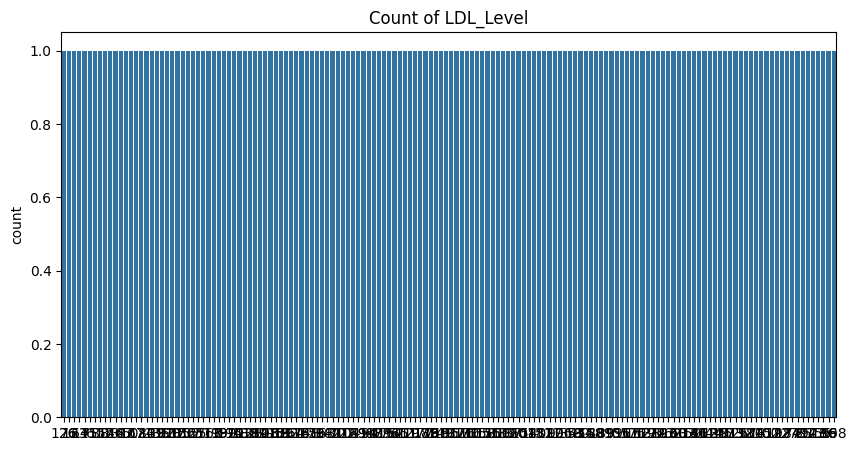

KeyError: 'Systolic_BP '

<Figure size 1000x500 with 0 Axes>

In [10]:


class UnivariateAnalysis:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def plot_numerical_distribution(self):
        """Plots histograms and boxplots for numerical variables."""
        numerical_cols = ['Emergency_Response_Time', 'Annual_Income', 'Diastolic_BP', 'Age']
        for col in numerical_cols:
            fig,ax = plt.subplots(1,2, figsize =(12,5))
            sns.histplot(self.df[col], bins = 40, kde = True, ax = ax[0])
            ax[0].set_title(f'Distribution of {col}')
            sns.boxplot(self.df[col], ax = ax[1])
            ax[1].set_title(f'Boxplot of {col}')
            plt.show()
    
    def plot_categorical_counts(self):
        cat_cols =['Gender','Diabetes','Hypertension', 'Obesity','Smoking','Alcohol_Consumption', 'Physical_Activity',
                      'Cholesterol_Level','Triglyceride_Level','LDL_Level','Systolic_BP ','Diastolic_BP','Air_Pollution_Exposure',
                      'Family_History','Stress_Level' ,'Healthcare_Access' ,'Heart_Attack_History']
        for col in cat_cols:
            plt.figure(figsize =(10,5))
            sns.countplot(self.df[col], order = self.df[col].value_counts().index)
            plt.title(f'Count of {col}')
            plt.show()
    
    
    
    def top_affected_countries(self):
        """Displays the top 10 most sold products by frequency."""
        plt.figure(figsize=(10, 5))
        top_country = self.df['State_Name'].value_counts().nlargest(10)
        sns.barplot(x= top_country.values, y= top_country.index)
        plt.title('Top 10 Most affected Countries')
        plt.xlabel('Number of affected Patients')
        plt.show()

    
    def heat_map(self):
        cat_cols =['Gender','Diabetes','Hypertension', 'Obesity','Smoking','Alcohol_Consumption', 'Physical_Activity',
                      'Cholesterol_Level','Triglyceride_Level','LDL_Level','Systolic_BP ','Diastolic_BP','Air_Pollution_Exposure',
                      'Family_History','Stress_Level' ,'Healthcare_Access' ,'Heart_Attack_History']
        plt.figure(figsize =(10,5))
        sns.heatmap(df[cat_cols].corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

    
    def run_univariate_analysis(self):
        """Runs all univariate analysis methods."""
        self.plot_numerical_distribution()
        self.plot_categorical_counts()
        self.plot_categorical_counts()
        self.heat_map()

   


df = pd.read_csv("heart_attack_prediction_india.csv")
univariate = UnivariateAnalysis(df)
univariate.run_univariate_analysis()


C:\Users\USER\AppData\Local\Temp\ipykernel_15276\2127995643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Age", data=data.df, palette="Blues")


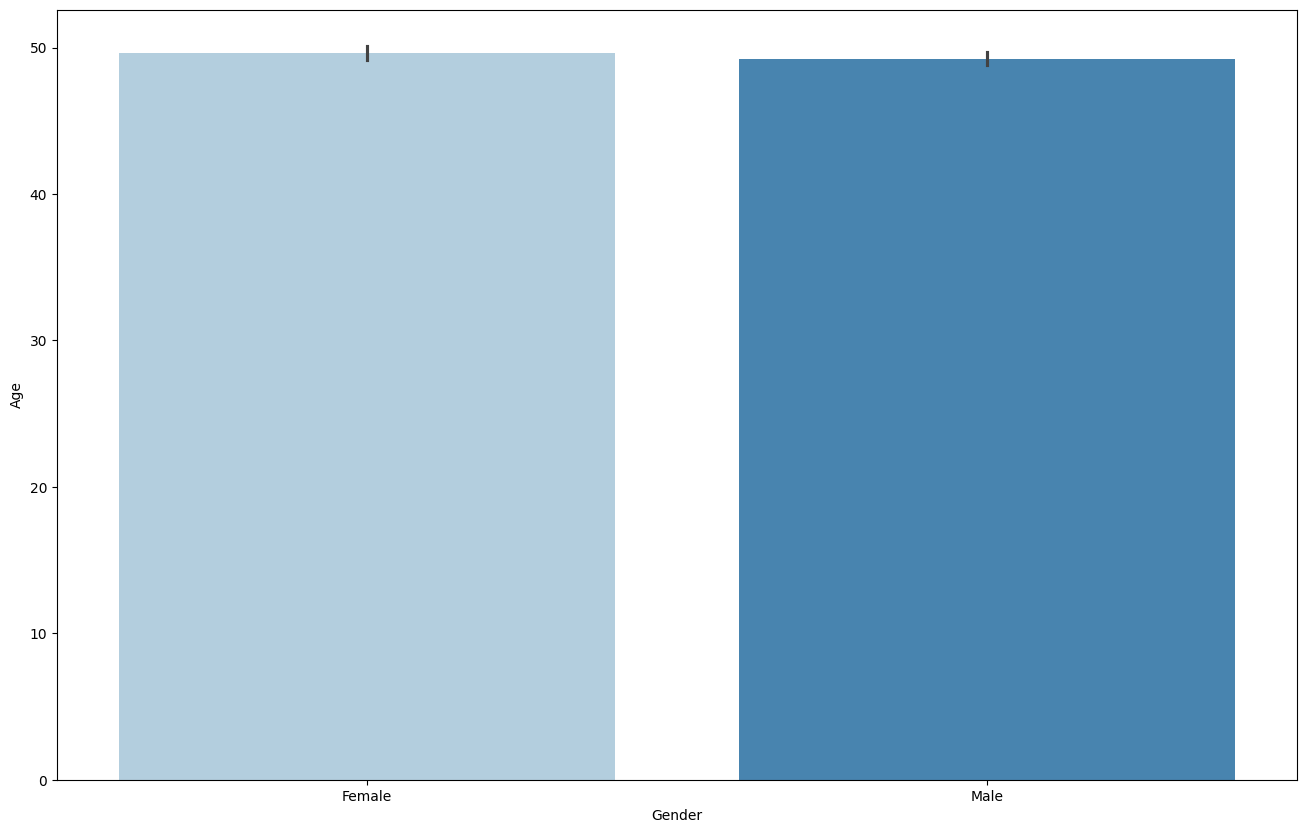

In [13]:
plt.figure(figsize=(16,10))
sns.barplot(x="Gender", y="Age", data=data.df, palette="Blues")
plt.show()


In [10]:
plt.figure(figsize =(16,10))
sns.barplot(x ="Gender", y = "Age", df = data)

ValueError: Could not interpret value `Gender` for `x`. Value is a string, but `data` was not passed.

<Figure size 1600x1000 with 0 Axes>

In [7]:
class DataVisualization(DataUnderstanding):
    def __init__(self,path):

        super().__init__(path)   #Inherit from data understanding

    def plot_barplots(self,x_col, y_col, title):
        plt.figure(figsize=(12,6))
        sns.countplot(x=self.df[x_col], y =self.df[y_col], palette="Blues")

        plt.title((f'bar plot for {self.df[x_col]} versus {self.df[y_col]}') )
        plt.xlabel(x_col, fontsize = 14)
        plt.ylabel(y_col, fontsize = 14)

        plt.xticks(rotation = 45)
        plt.show()

path = "heart_attack_prediction_india.csv"
data_viz = DataVisualization(path)
 
data_viz.plot_barplots(x_col="Gender", y_col="Age", title="Average Age of Patients by State")
        

TypeError: Cannot pass values for both `x` and `y`.

<Figure size 1200x600 with 0 Axes>